# Boston House Price Prediction using regression model
## WMASDS22: Machine Learning for Data Science
- Multiple Linear Regression 
- Polynomial Regression
- Regularization 
  - Lasso (L1)
  - Ridge (L2)
- Hyperparameter Tuning
- Cross Validation
  - Random Search

### Import Libraries

In [1]:
import numpy as np
import pandas as pd                      
import matplotlib.pyplot as plt          # plotting library
import seaborn as sns                    # plotting library

from sklearn.datasets import load_boston # to load the dataset

from sklearn.linear_model import LinearRegression, Ridge, Lasso # regression model
from sklearn.preprocessing import PolynomialFeatures, scale     # preprocessing steps

from sklearn.model_selection import train_test_split, cross_val_score # cross validation

import warnings
warnings.filterwarnings('ignore')

### Load the boston data from scikit-learn

In [2]:
boston = load_boston()
print(type(boston))
print(boston.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# display(boston.DESCR)

### Create DataFrame

In [4]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


### Perform EDA
- perform tabular and graphical EDA for better understanding your dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
sns.pairplot(df)

### Data Preprocessing
prepare your dataset for modeling
  - do necessary changes like feature selection, feature scaling etc (when needed)
  - create/transform features (if necessary)
  - drop or impute missing values (if any)
  - Encoding catergorical features (if any)
  - identifying or eliminating outliers (if any)

###  Is there any missing value in the dataset? which variable contains missing value? How to fill/impute missing values?

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

**There is no missing values!** In practice, this is very rare, we expect to have some missing entries!

### Partitioning features and target

In [8]:
X = df.drop('Price', axis = 1)
y = df['Price']
X.shape, y.shape

((506, 13), (506,))

#### Train Test Split

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=X['CHAS']>0,test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### Perform Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

- Question: **Is the model underfitted?**

#### Model's Performance

In [11]:
# Training score
lr_score_train  = lr.score(X_train, y_train)
lr_score_test = lr.score(X_test, y_test)

print('score on training dataset usnig linear regression model:', round(lr_score_train,3))
print('score on test dataset using linear regression model:', round(lr_score_test,3))

score on training dataset usnig linear regression model: 0.751
score on test dataset using linear regression model: 0.669


**The model is probably underfitted!**
<br>
- Question: How to improve model performance? (e.g., polynomial regression, regularization)

In [12]:
# Calculate score explicitly without using module/function
import numpy as np
mean_y = np.mean(y_train)
squared_errors_mean = np.sum((y_train - mean_y)**2)
squared_errors_model = np.sum((y_train -lr.predict(X_train))**2)
R2 = 1 - (squared_errors_model / squared_errors_mean)
print ('Computed R2', round(R2,3))

Computed R2 0.751


### Show the coefficients
- **Find the coefficients of multiple linear regression model for predicting house price.**

In [13]:
lr.intercept_,  lr.coef_

(30.24675099392408,
 array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]))

In [14]:
# coef = pd.DataFrame(data = boston.feature_names, columns = ['Features'])
# coef['Coefficients']=lr.coef_
# coef

In [15]:
coef = pd.DataFrame(data=lr.coef_ , columns = ['Coefficients'], index = boston.feature_names)
coef.reset_index(inplace=True)
coef

,index,Coefficients
0,CRIM,-0.113056
1,ZN,0.030110
2,INDUS,0.040381
3,CHAS,2.784438
4,NOX,-17.202633
5,RM,4.438835
6,AGE,-0.006296
7,DIS,-1.447865
8,RAD,0.262430
9,TAX,-0.010647


### Encoding Qualitative Variable (if any)
- Which method will you prefer for encoding categorical varialbes? Label Econding or One-hot Encoding? Why?

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
OHE = OneHotEncoder(sparse=False)

In [17]:
qualitative = ['red', 'red', 'green', 'blue', 'red', 'blue', 'blue', 'green'] # catergorical/qualitative data

labels = LE.fit_transform(qualitative).reshape(-1, 1) # Label encoding
# print(LE.classes_)
# print(labels)

# print(OHE.fit_transform(labels)) # One Hot Encoding

#### Create dataframe 

In [18]:
df_cat_en=pd.DataFrame(data=OHE.fit_transform(labels), columns = LE.classes_)
# df_cat_en

#### One Hot Encoding using get_dummies from pandas

In [19]:
cat = pd.DataFrame(qualitative, columns=['colors'])
df_cat_gd = pd.get_dummies(cat)
# df_cat_gd

## Polynomial Regression
- Is the model overfitted/underfitted? How to improve model performance?

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train) # Transform features to polynomial of degree 2
print('\nchange the dimension of feature matrix: ',X_train.shape, 'to', X_train_poly.shape,'\n')

PR = LinearRegression()
PR.fit(X_train_poly, y_train) # Fit the polynomial regression model

r2 = PR.score(X_train_poly, y_train) # scores on train data
print('Train R2 score for polynomial regression:',r2)

X_test_poly = pf.transform(X_test) # transform test features
r2_test = PR.score(X_test_poly, y_test)# scores on test data
print('Test R2 score for polynomial regression:',r2_test)


change the dimension of feature matrix:  (404, 13) to (404, 105) 

Train R2 score for polynomial regression: 0.9388251256169509
Test R2 score for polynomial regression: 0.8065890290078337


**The model is overfitted! Since the training score is much higher than the test score.**

## Cross Validation

In [21]:
#perform cross validation in linear regression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores_lr

array([0.77501982, 0.62424945, 0.7594282 , 0.78766681, 0.67581438])

In [22]:
#perform cross validation in polynomial regression
PR = LinearRegression()
PR.fit(X_train_poly, y_train)
scores_poly = cross_val_score(PR, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly

array([0.09859507, 0.77732348, 0.71374143, 0.84206701, 0.76337186])

**Clearly! an overfitted model**
- Explain-why?

## Regularization
- Is regularization techniques improve the performance of your model? which technique do you prefer?

#### L1 : LASSO

In [23]:
# lasso with linear features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
lasso.fit(X_train, y_train)
print('test score:',lasso.score(X_test, y_test))
print('train score:',lasso.score(X_train, y_train))

test score: 0.24922195454970486
train score: 0.23116549488143734


In [24]:
# cross validation with LASSO for linear features
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)

scores_lasso = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
scores_lasso

array([0.24026129, 0.18547564, 0.25884267, 0.27323669, 0.11079364])

In [25]:
# LASSO with polynomial features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
lasso.fit(X_train_poly, y_train)

print('train score (L1):',lasso.score(X_train_poly, y_train))
print('test score (L1):',lasso.score(X_test_poly, y_test))

train score (L1): 0.8246549483584114
test score (L1): 0.7892995079242417


In [26]:
#perform cross validation in LASSO with polynomial features
lasso = Lasso(alpha = 50, max_iter = 1000, tol = 0.1)
scores_poly_lasso = cross_val_score(lasso, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly_lasso

array([0.78898182, 0.71459725, 0.85051456, 0.84146452, 0.74992957])

#### L2: Ridge

In [27]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
rr.fit(X_train,y_train)
print('train score (L2):',rr.score(X_train, y_train))
print('test score (L2):',rr.score(X_test, y_test))
print(rr.coef_)

train score (L2): 0.7438801903180616
test score (L2): 0.6628922072683874
[-0.10696184  0.03448822 -0.01897629  2.12418278 -3.41613155  4.36224263
 -0.01574942 -1.25328057  0.24359372 -0.01233222 -0.76793697  0.01283782
 -0.54566807]


In [28]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
rr.fit(X_train_poly,y_train)
print('train score (L2) with polynomial features:',rr.score(X_train_poly, y_train))
print('test score (L2) with polynomial features:',rr.score(X_test_poly, y_test))
print('\n')
print(rr.coef_)

train score (L2) with polynomial features: 0.9319236032704733
test score (L2) with polynomial features: 0.7983877074162816


[ 0.00000000e+00 -3.04952558e-01  1.31130230e-03 -7.07740396e-01
  1.56488180e-01  5.47465170e-02  8.51568720e-01  5.03696813e-01
 -1.75969603e-01  8.84015490e-01 -1.36230942e-02 -6.32830213e-01
  1.89710575e-01 -8.33150552e-01  3.04290717e-04 -2.17376481e-02
  2.78700927e-01  2.73301813e+00 -1.34432356e+00  1.87960504e-01
 -1.99254413e-03 -4.28328878e-02  2.18837564e-01 -2.11330955e-02
  1.74200103e-01 -4.24544502e-04  2.75006388e-02  5.64144798e-04
  5.52149261e-04 -1.34414821e-02  7.62669591e-02 -1.08583496e-02
  4.78765048e-04 -1.81430999e-02 -1.34894810e-02  4.01987227e-04
  6.95009678e-03 -1.10011752e-04 -9.46612152e-03  2.95586930e-02
 -1.94882630e-01  4.44703759e-01  7.47776167e-02  3.38188516e-03
  2.75645807e-02  9.91914091e-03  9.07463463e-04 -7.29823173e-02
  5.57937879e-04 -2.49878994e-02  1.56488180e-01 -2.56760597e-01
 -2.70849817e+00  4.69188107e-

In [29]:
# cross validation linear regression
from sklearn.model_selection import cross_val_score
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)

scores_rr = cross_val_score(rr, X_train, y_train, scoring='r2', cv=5)
scores_rr

array([0.75550702, 0.6271085 , 0.7541725 , 0.78096855, 0.65941536])

In [30]:
#perform cross validation in polynomial regression
rr = Ridge(alpha = 5, max_iter = 100, tol = 0.1)
scores_poly_rr = cross_val_score(rr, X_train_poly, y_train, scoring='r2', cv=5)
scores_poly_rr

array([0.72995813, 0.79398593, 0.73520035, 0.87590643, 0.81706584])

## Hyperparameter tuning using gridsearchcv()

In [31]:
# lasso with linear features
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
# lasso.fit(X_train, y_train)

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.1, 0.0001,0.001,0.01,0.2], 'max_iter':[10,50,100,500]}


gs = GridSearchCV(lasso,param_grid,cv=10)
gs.fit(X_train, y_train)
gs.best_params_
gs.cv_results_['mean_test_score'].min(), gs.cv_results_['mean_test_score'].max()


(0.19611579373923535, 0.6570541971408544)

**scores near zero indicate poor performance**

In [32]:
# polynomial features
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.0001,0.001,0.01,0.1,0.2], 'max_iter':[10,50,100,500]}


gs = GridSearchCV(lasso,param_grid,cv=10)
gs.fit(X_train_poly, y_train)

gs.best_params_

gs.cv_results_['mean_test_score'].min(), gs.cv_results_['mean_test_score'].max()

(0.7009177902665705, 0.8027631316630514)

**scores closer to one indicates that the model performing better!**

In [33]:
# ridge
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rr = Ridge()

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.0001,0.001,0.01,0.1,0.2], 'max_iter':[10,50,100,500]}

gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(X_train, y_train)
print(gs.best_params_)
gs.cv_results_['mean_test_score'].min(), gs.cv_results_['mean_test_score'].max()

{'alpha': 1, 'max_iter': 10, 'tol': 0.0001}


(0.6837988758705879, 0.695496021863359)

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rr = Ridge()

param_grid = {'alpha': [1,5,50,60,90,100],'tol':[0.0001,0.001,0.01,0.1,0.2], 'max_iter':[100,10]}

gs = GridSearchCV(rr,param_grid,cv=10)

gs.fit(X_train_poly, y_train)
print(gs.best_params_)
print('\nminimum score is: ', gs.cv_results_['mean_test_score'].min())
print('\nmaximum score is: ', gs.cv_results_['mean_test_score'].max(),'\n')
# print(gs.cv_results_['mean_test_score'])

cv_result = pd.DataFrame(gs.cv_results_)
cv_result = cv_result[['param_alpha', 'param_max_iter','param_tol','rank_test_score', 
                       'mean_test_score', 'std_test_score','split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score',
                       'split7_test_score','split8_test_score','split9_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}

minimum score is:  0.7649822428599264

maximum score is:  0.7755505568143506 



,param_alpha,param_max_iter,param_tol,rank_test_score,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
59,100,10,0.2,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
50,100,100,0.0001,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
51,100,100,0.001,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
52,100,100,0.01,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
53,100,100,0.1,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
58,100,10,0.1,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
55,100,10,0.0001,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
56,100,10,0.001,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
57,100,10,0.01,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553
54,100,100,0.2,1,0.775551,0.160309,0.847639,0.831140,0.901426,0.401851,0.580785,0.889397,0.899397,0.857694,0.873623,0.672553


Index(['param_alpha', 'param_max_iter', 'param_tol', 'rank_test_score',
       'mean_test_score', 'std_test_score', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score'],
      dtype='object')


**We perform multiple linear regression to predict the house price based on the given features. The performance indicates model is probably underfitted. we then tried polynomial regression and found that this model is overfitted. to overcome overfitting issue we apply regularization techniques L1 and L2 and found that L2 (Ridge) regularization with polynomial feature perform better in this perticular case. After that we perform hyperparameter tuning to obtain the optimum model.
<br>Finally we got best regression model with optimum hyperparameters applying L2 with polynomial features.**

## Model performance evaluation with the best found model in grid search and cross-validation

In [35]:
rr = Ridge()
gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(X_train_poly, y_train)
print(gs.best_params_)

# test score using best found model
gs.score(X_test_poly,y_test)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}


0.808931910430797

## Prediction

In [36]:
rr = Ridge()
gs = GridSearchCV(rr,param_grid,cv=10)
gs.fit(X_train_poly, y_train)
print(gs.best_params_)

# predict y value with test feature values using best found model

y_pred = gs.predict(X_test_poly)

price = pd.DataFrame({"Price_actual":y_test,
                   "Price_predicted": y_pred})

display(price)

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}


,Price_actual,Price_predicted
173,23.6,26.477159
274,32.4,33.583371
491,13.6,14.979459
72,22.8,21.834182
452,16.1,15.182430
...,...,...
412,17.9,13.497873
436,9.6,12.432217
411,17.2,14.941107
86,22.5,23.755274


#### Prediction Error

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = ", MAE)

MSE = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", RMSE)

r2 = r2_score(y_test, y_pred)
print("r_squared = ", r2)

MAE =  2.486093786732154
MSE =  14.011745849325095
RMSE =  3.743226662830491
r_squared =  0.808931910430797


**Mean absolute error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
<br>**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
<br>**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.
<br>**Coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

## How to get the regression coefficients of finally selected model

In [38]:
gs.best_params_

{'alpha': 100, 'max_iter': 100, 'tol': 0.0001}

In [39]:
rr_final=Ridge(alpha= 100, max_iter= 100, tol= 0.0001)
rr_final.fit(X_train_poly,y_train)
print(rr_final.intercept_)
rr_final.coef_

-27.24335333843289


array([ 0.00000000e+00, -1.53284134e-02, -1.09560926e-01, -2.26421226e-02,
       -2.50518882e-04,  7.16292976e-03,  1.02792132e-01,  1.55800322e-01,
       -2.85927281e-02,  6.56792986e-02,  3.05288486e-03, -7.63406798e-02,
        1.76174962e-01, -9.03682722e-02, -1.72137574e-04,  5.85451023e-02,
        6.28337675e-02,  7.42888422e-01, -1.04020745e-01,  1.79241966e-01,
       -1.84134426e-03, -3.75244800e-02, -1.35399594e-02, -3.12065735e-03,
        3.69942998e-03, -3.39099814e-04,  1.93914375e-02,  5.01748577e-04,
        9.54924266e-04, -2.21283237e-03,  6.17781249e-02,  1.03184889e-02,
        6.56346484e-04, -1.29039129e-02, -1.20943676e-02,  4.62138351e-04,
        7.80581274e-03, -3.95405340e-04, -8.08923642e-03,  2.55534525e-02,
       -6.73723090e-02,  3.81015339e-02, -5.21572782e-03,  5.58121000e-03,
        1.28055184e-02,  1.21929258e-02,  1.18318974e-03, -6.24314639e-02,
        2.23009248e-05, -2.65375923e-02, -2.50518882e-04, -2.68817728e-02,
       -3.60437884e-01, -

## Compare the predicted target values with actual value

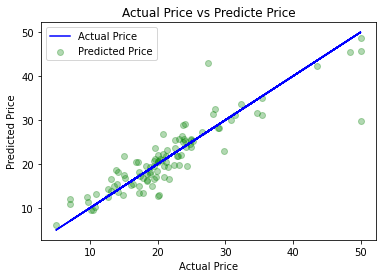

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(price['Price_actual'],price['Price_predicted'], color = 'green', alpha = 0.3)
plt.plot(price['Price_actual'],price['Price_actual'], color = 'blue', alpha = 1)
plt.legend(['Actual Price','Predicted Price'])

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicte Price')
plt.show()
plt.tight_layout()

### Also Perform:
- EDA
- preprocessing

### Further Consideration:
- Features Selection
- Dimensionality Reduction